# Sales Performance Analysis


## Business Problem
The goal of this analysis is to identify sales performance patterns across regions and product categories and provide actionable business recommendations.


## Data Loading
In this section, the dataset is loaded and initial data inspection is performed.


In [1]:
import pandas as pd
df = pd.read_csv("messy_sales_data.csv")



In [2]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     10 non-null     int64  
 1   order_date   9 non-null      object 
 2   region       9 non-null      object 
 3   category     9 non-null      object 
 4   sales        9 non-null      float64
 5   customer_id  10 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 612.0+ bytes


## Data Cleaning
This section focuses on cleaning and preparing the data for analysis, including handling missing values, standardizing text fields, and correcting data types.


In [3]:
df.duplicated()


0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [4]:
df = df.drop_duplicates()


In [5]:
df.shape


(9, 6)

In [6]:
df["region"] = df["region"].str.strip().str.title()
df["category"] = df["category"].str.strip().str.title()


In [7]:
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")


In [8]:
df["sales"] = pd.to_numeric(df["sales"], errors="coerce")


In [9]:
df.isna().sum()


order_id       0
order_date     1
region         1
category       1
sales          1
customer_id    0
dtype: int64

In [10]:
df = df.dropna(subset=["sales", "region"])


In [11]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 9
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     7 non-null      int64         
 1   order_date   7 non-null      datetime64[ns]
 2   region       7 non-null      object        
 3   category     6 non-null      object        
 4   sales        7 non-null      float64       
 5   customer_id  7 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 392.0+ bytes


,order_id,order_date,region,category,sales,customer_id
0,1001,2025-01-05,West,Furniture,250.0,C001
1,1002,2025-01-12,West,Furniture,300.0,C002
2,1003,2025-02-01,East,Technology,450.5,C003
4,1004,2025-02-15,South,Office Supplies,120.0,C004
6,1006,2025-03-03,North,Furniture,500.0,C006


## Exploratory Data Analysis (EDA)
This section explores sales trends across regions and product categories to identify key performance drivers.


In [12]:
df.describe()


,order_id,order_date,sales
count,7.000000,7,7.000000
mean,1004.714286,2025-02-13 06:51:25.714285824,281.500000
min,1001.000000,2025-01-05 00:00:00,120.000000
25%,1002.500000,2025-01-22 00:00:00,175.000000
50%,1004.000000,2025-02-15 00:00:00,250.000000
75%,1007.000000,2025-03-09 00:00:00,375.250000
max,1009.000000,2025-03-20 00:00:00,500.000000
std,3.039424,NaN,145.862092


In [13]:
sales_by_category = df.groupby("category")["sales"].sum().sort_values(ascending=False)
sales_by_category


category
Furniture          1050.0
Technology          450.5
Office Supplies     270.0
Name: sales, dtype: float64

In [14]:
df.to_csv("clean_sales_data.csv", index=False)


The following charts explore regional sale performance.

In [15]:
df.columns = df.columns.str.strip().str.title()


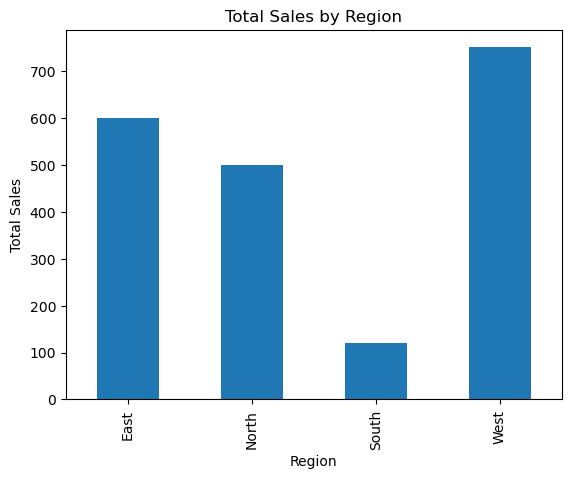

In [16]:
import matplotlib.pyplot as plt

sales_by_region = df.groupby("Region")["Sales"].sum()

sales_by_region.plot(kind="bar")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


**Insight:**

The West region generated the highest total sales, making it the strongest performing region in this dataset. Other regions, including the North and South, show lower total sales, indicating uneven performance across regions.


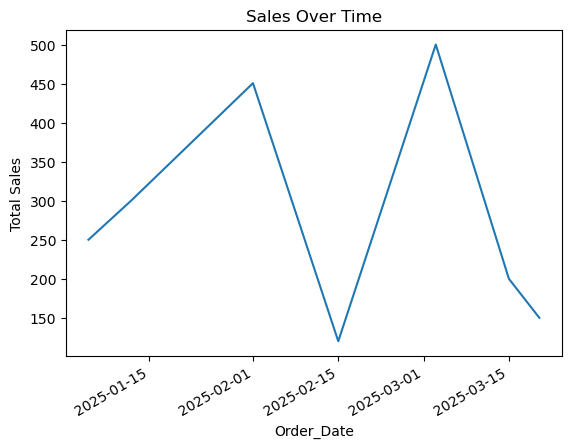

In [18]:
sales_over_time = df.groupby("Order_Date")["Sales"].sum()

sales_over_time.plot(kind="line")
plt.title("Sales Over Time")
plt.xlabel("Order_Date")
plt.ylabel("Total Sales")
plt.show()





**Insight:**

Sales show noticeable peaks and dips over time, suggesting possible seasonality or event-driven changes in demand.


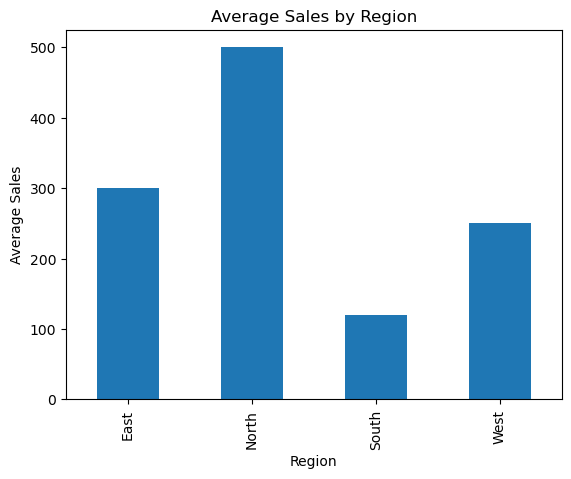

In [19]:
import matplotlib.pyplot as plt

avg_sales_by_region = df.groupby("Region")["Sales"].mean()

avg_sales_by_region.plot(kind="bar")
plt.title("Average Sales by Region")
plt.xlabel("Region")
plt.ylabel("Average Sales")
plt.show()



**Insight:**


Average sales differ across regions, showing that some regions consistently generate higher-value transactions than others. This suggests opportunities for region-specific pricing and sales strategies

## Key Insights
- The West region is the top-performing region by total sales
- The South region is the lowest-performing region
- Furniture is the highest-selling category
- Office Supplies is the lowest-selling category


## Recommendations
- Replicate successful strategies from the West region in underperforming regions
- Introduce targeted promotions to improve Office Supplies sales


## Next Steps
Future improvements for this project could include:
- Deeper time-series analysis of sales trends
- Additional segmentation by product or customer type
- Building a simple dashboard to visualize sales performance
